# Prueba curso GeoPython

**Profesor:** *Herberd*

**Alumno:** *Daniel Eduardo Díaz Almeida*

**Instrucciones prueba curso geopython:**
	
	1  Leer el dataset de nombre «prueba_curso_geopython»
	2  Visualizar la variable en el plano, con respectivas etiquetas y mapa de colores.
	3  Obtener media, mediana, moda, varianza, desviación estándar, coeficiente de variación, factor de asimetría y curtosis de la variable de interés.
	4  Gráfico de derivas [x-variable], [y-variable].
	5  Graficar histograma simple, acumulado, cajas y bigotes.
	6  Obtener variograma (parámetros determinados de forma independiente por el estudiante) – [PyKrige].
	7  Crear grilla referente a los limites del modelo con celdas de tamaño seleccionadas por el estudiante.
	8  Generar una estimación mediante Kriging Ordinario, obteniendo además varianza de estimación.
	9  En una figura (matplotlib), crear 3 gráficos [muestras, estimación, varianza de estimación].

-------------------------------------------------------------------------------------------------------------------------------

**Bibliotecas**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geostatspy.GSLIB as GSLIB # Utilidades GSLIB y funciones envueltas.
from mpl_toolkits.mplot3d import Axes3D
import geostatspy.geostats as geostats
plt.style.use('ggplot')
%matplotlib inline

## 1.- Lectura de dataset de nombre «prueba_curso_geopython»

In [2]:
folder = "C:/Users/DDA_CDEA/Desktop/Daniel_Eduardo/Excel-stuff_and_programming/Programming-exercises/Python_programming/Curso_geoPython/dataset_curso/"
file = "prueba_curso_geopython.txt"

df = pd.read_csv(folder + file, sep="\t", skiprows=[0,1,2,3,4,5,6,7,8,9], header=None)

In [3]:
df.head()

,0,1,2,3,4,5
0,1,200,200,75,1,0.113597
1,1,200,200,80,2,0.402376
2,1,200,200,85,3,0.738256
3,1,200,200,90,4,0.788436
4,1,200,200,95,5,0.774902


In [4]:
df.shape

(1080, 6)

In [5]:
data = {"ID Sondaje":df[0], "Este [X]":df[1], "Norte [Y]":df[2], "Cota [Z]":df[3], "Ley Cu [%]":df[5]}
df = pd.DataFrame(data)
df.head(n=10)

,ID Sondaje,Este [X],Norte [Y],Cota [Z],Ley Cu [%]
0,1,200,200,75,0.113597
1,1,200,200,80,0.402376
2,1,200,200,85,0.738256
3,1,200,200,90,0.788436
4,1,200,200,95,0.774902
5,1,200,200,100,0.998138
6,1,200,200,105,0.865264
7,1,200,200,110,1.020720
8,1,200,200,115,1.468390
9,1,200,200,120,1.178550


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID Sondaje,1080.0,45.500000,25.991194,1.000000,23.000000,45.50000,68.00000,90.00000
Este [X],1080.0,425.000000,143.680600,200.000000,300.000000,425.00000,550.00000,650.00000
Norte [Y],1080.0,400.000000,129.159255,200.000000,300.000000,400.00000,500.00000,600.00000
Cota [Z],1080.0,102.500000,17.268259,75.000000,88.750000,102.50000,116.25000,130.00000
Ley Cu [%],1080.0,1.111156,0.487569,0.016985,0.760585,1.06118,1.41183,2.96329


## 2.- Visualización la variable en el plano, con respectivas etiquetas y mapa de colores

In [7]:
x = np.array(df["Este [X]"])
y = np.array(df["Norte [Y]"])
z = np.array(df["Cota [Z]"])
cu = np.array(df["Ley Cu [%]"])

In [8]:
len(cu)

1080

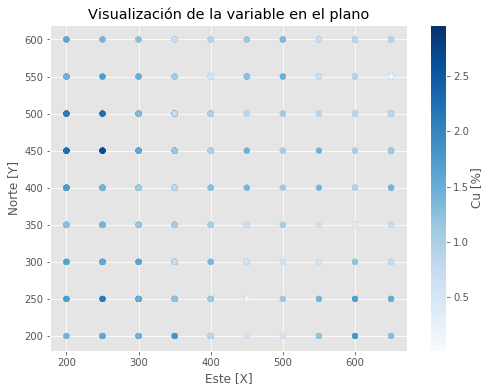

In [9]:
marker_size = 30
plt.figure(figsize=(8,6))
plt.scatter(x,y, marker_size, cu, cmap=plt.cm.Blues)
plt.grid(True)
plt.xlabel("Este [X]"), plt.ylabel("Norte [Y]")
plt.title("Visualización de la variable en el plano")
cbar=plt.colorbar()
cbar.set_label('Cu [%]',labelpad=+1)
plt.show()

## 3.- Cálculo de media, mediana, moda, varianza, desviación estándar, coeficiente de variación, factor de asimetría y curtosis de la variable de interés: *En este caso, la variable de interés en el dataset en estudio es la Ley de Cobre [%]*

In [10]:
# Media
print("La media de la Ley de Cobre es:", round(df["Ley Cu [%]"].mean(), 2))

La media de la Ley de Cobre es: 1.11


In [11]:
# Mediana
print("La mediana de la Ley de Cobre es:", round(df["Ley Cu [%]"].median(), 2))

La mediana de la Ley de Cobre es: 1.06


In [12]:
# Moda
print("La moda de la Ley de Cobre es:\n",round(df["Ley Cu [%]"].mode(), 2))

La moda de la Ley de Cobre es:
 0    0.8
1    1.3
dtype: float64


In [13]:
# Varianza
print("La varianza de la Ley de Cobre es:",round(df["Ley Cu [%]"].var(), 2))

La varianza de la Ley de Cobre es: 0.24


In [14]:
# Desviación estándar
std_d = np.sqrt(df["Ley Cu [%]"].var())
print("La desviación estándar de la Ley de Cobre es:",round(std_d, 2))

La desviación estándar de la Ley de Cobre es: 0.49


In [15]:
# coeficiente de variación
var_coef = (std_d/df["Ley Cu [%]"].mean())*100
print("El coeficiente de variación de la Ley de Cobre es:",round(var_coef, 2))

El coeficiente de variación de la Ley de Cobre es: 43.88


In [16]:
# Factor de simetría o skewness
print("El factor de simetría de la Ley de Cobre es:",round(df["Ley Cu [%]"].skew(),2))

El factor de simetría de la Ley de Cobre es: 0.53


*Como se puede ver arriba, el factor de simetría (o skewness) es positivo. Esto quiere decir que la distribución de los datos está hacia la derecha, i.e., los datos no están balanceados. Sin embargo, aunque no estén completamente balanceados, parecen tener un buen balance dado que el skewness es cercano a cero*

In [17]:
# Curtosis
print("La curtosis de la Ley de Cobre es:",round(df["Ley Cu [%]"].kurt(),2))

La curtosis de la Ley de Cobre es: 0.26


## 4.- Gráfico de derivas [x-variable], [y-variable].

*Nos interesa conocer el comportamiento de la variable "Cu" a distintas distancias de los ejes mencionados.* **En nuestro caso, utilizando únicamente las librerias antes importadas, es que requerimos crear algunos DataFrames:**

In [18]:
# Matriz Este - Cu
df_new_x = pd.DataFrame({"from":list(range(200,601,50)), "to":list(range(250,651,50)), "Cu [%]":np.nan})
df_new_x

,from,to,Cu [%]
0,200,250,NaN
1,250,300,NaN
2,300,350,NaN
3,350,400,NaN
4,400,450,NaN
5,450,500,NaN
6,500,550,NaN
7,550,600,NaN
8,600,650,NaN


Debemos calcular la ley media en cada una de las ventanas creadas (50 metros):

In [19]:
a = df[(df['Este [X]'] >= 200) & (df['Este [X]'] < 250)].mean() # Cu media entre 0 y <50 metros del eje X [ventana 1]
b = df[(df['Este [X]'] >= 250) & (df['Este [X]'] < 300)].mean()
c = df[(df['Este [X]'] >= 300) & (df['Este [X]'] < 350)].mean()
d = df[(df['Este [X]'] >= 350) & (df['Este [X]'] < 400)].mean()
e = df[(df['Este [X]'] >= 400) & (df['Este [X]'] < 450)].mean()
f = df[(df['Este [X]'] >= 450) & (df['Este [X]'] < 500)].mean()
g = df[(df['Este [X]'] >= 500) & (df['Este [X]'] < 550)].mean()
h = df[(df['Este [X]'] >= 550) & (df['Este [X]'] < 600)].mean()
i = df[(df['Este [X]'] >= 600) & (df['Este [X]'] < 650)].mean()
# las nx son las leyes medias de Cu para cada ventana del eje 'X', recordar que la longitud por ventana es de 50 m
ax = a["Ley Cu [%]"]
bx = b["Ley Cu [%]"]
cx = c["Ley Cu [%]"]
dx = d["Ley Cu [%]"]
ex = e["Ley Cu [%]"]
fx = f["Ley Cu [%]"]
gx = g["Ley Cu [%]"]
hx = h["Ley Cu [%]"]
ix = i["Ley Cu [%]"]
print("ax =",ax,'\n',"bx =",bx,'\n',"cx =",cx,'\n',"dx =",dx,'\n',"ex =",ex,'\n',"fx =",fx,'\n',"gx =",gx,'\n',"hx =",hx,'\n',"ix =",ix)

ax = 1.4728400092592593 
 bx = 1.5014024138888888 
 cx = 1.3322831388888896 
 dx = 1.2377657592592588 
 ex = 1.0948337111111113 
 fx = 0.8646881148148148 
 gx = 0.8044589407407409 
 hx = 0.8496130462962964 
 ix = 0.9363100648148147


*Ahora pasaremos nuestras leyes al nuevo DataFrame*

In [20]:
df_new_x['Cu [%]'] = [ax, bx, cx, dx, ex, fx, gx, hx, ix]

*Antes de graficar, crearemos una nueva columna con el promedio de "from - to":*

In [21]:
df_new_x['promxy'] = df_new_x['to'] - 25
df_new_x.head(9)

,from,to,Cu [%],promxy
0,200,250,1.472840,225
1,250,300,1.501402,275
2,300,350,1.332283,325
3,350,400,1.237766,375
4,400,450,1.094834,425
5,450,500,0.864688,475
6,500,550,0.804459,525
7,550,600,0.849613,575
8,600,650,0.936310,625


**Grafiquemos la deriva [Este vs Cu]**

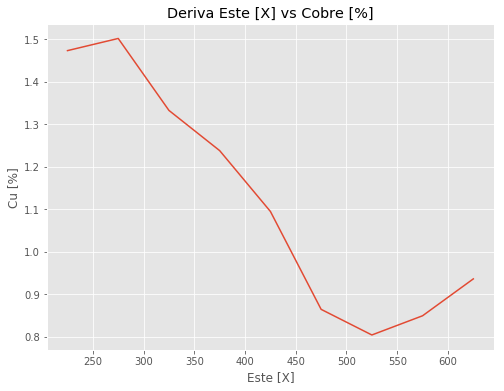

In [22]:
plt.figure(figsize=(8,6))
plt.plot(df_new_x['promxy'], df_new_x['Cu [%]'])
plt.xlabel('Este [X]'), plt.ylabel('Cu [%]')
plt.title('Deriva Este [X] vs Cobre [%]')
plt.show()

*Ahora, determinaremos la deriva correspondiente al Norte [Y] - Ley de Cobre [%]*

In [23]:
# Matriz Norte - Cu
df_new_y = pd.DataFrame({"from":list(range(200,551,50)), "to":list(range(250,601,50)), "Cu [%]":np.nan})
df_new_y

,from,to,Cu [%]
0,200,250,NaN
1,250,300,NaN
2,300,350,NaN
3,350,400,NaN
4,400,450,NaN
5,450,500,NaN
6,500,550,NaN
7,550,600,NaN


In [24]:
a = df[(df['Norte [Y]'] >= 200) & (df['Norte [Y]'] < 250)].mean() # Cu media entre 0 y <50 metros del eje X [ventana 1]
b = df[(df['Norte [Y]'] >= 250) & (df['Norte [Y]'] < 300)].mean()
c = df[(df['Norte [Y]'] >= 300) & (df['Norte [Y]'] < 350)].mean()
d = df[(df['Norte [Y]'] >= 350) & (df['Norte [Y]'] < 400)].mean()
e = df[(df['Norte [Y]'] >= 400) & (df['Norte [Y]'] < 450)].mean()
f = df[(df['Norte [Y]'] >= 450) & (df['Norte [Y]'] < 500)].mean()
g = df[(df['Norte [Y]'] >= 500) & (df['Norte [Y]'] < 550)].mean()
h = df[(df['Norte [Y]'] >= 550) & (df['Norte [Y]'] < 600)].mean()
# las nx son las leyes medias de Cu para cada ventana del eje 'X', recordar que la longitud por ventana es de 50 m
ay = a["Ley Cu [%]"]
by = b["Ley Cu [%]"]
cy = c["Ley Cu [%]"]
dy = d["Ley Cu [%]"]
ey = e["Ley Cu [%]"]
fy = f["Ley Cu [%]"]
gy = g["Ley Cu [%]"]
hy = h["Ley Cu [%]"]
print("ay =",ay,'\n',"by =",by,'\n',"cy =",cy,'\n',"dy =",dy,'\n',"ey =",ey,'\n',"fy =",fy,'\n',"gy =",gy,'\n',"hy =",hy)

ay = 0.9768125833333331 
 by = 1.0797048224999999 
 cy = 1.0355179833333332 
 dy = 1.0227566583333338 
 ey = 1.1847504333333334 
 fy = 1.3243598083333332 
 gy = 1.265382091666666 
 hy = 1.1322722866666668


*Al igual que lo hecho anteriormente, creamos una columna con el promedio de "from-to"*

In [25]:
df_new_y['Cu [%]'] = [ay, by, cy, dy, ey, fy, gy, hy]
df_new_y['promxy'] = df_new_y['to'] - 25
df_new_y.head(8)

,from,to,Cu [%],promxy
0,200,250,0.976813,225
1,250,300,1.079705,275
2,300,350,1.035518,325
3,350,400,1.022757,375
4,400,450,1.184750,425
5,450,500,1.324360,475
6,500,550,1.265382,525
7,550,600,1.132272,575


**Gráfica la deriva [Norte vs Cu]**

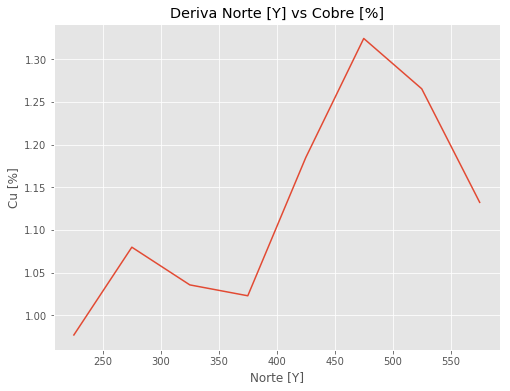

In [26]:
plt.figure(figsize=(8,6))
plt.plot(df_new_y['promxy'], df_new_y['Cu [%]'])
plt.xlabel('Norte [Y]'), plt.ylabel('Cu [%]')
plt.title('Deriva Norte [Y] vs Cobre [%]')
plt.show()

## 5.- Gráfica de histograma simple, acumulado, cajas y bigotes.

*Histograma simple*

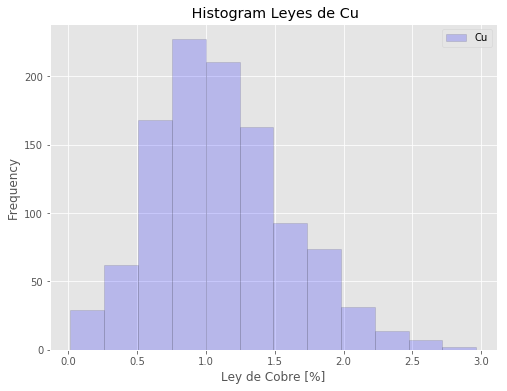

In [27]:
plt.figure(figsize=(8,6))
plt.hist(df['Ley Cu [%]'], alpha=.2, edgecolor = 'black', bins = 'sturges', color = 'blue', label = 'Cu') 
plt.xlabel('Ley de Cobre [%]')
plt.ylabel('Frequency')
plt.title(' Histogram Leyes de Cu')
plt.legend()
plt.show()

*Histograma acumulado*

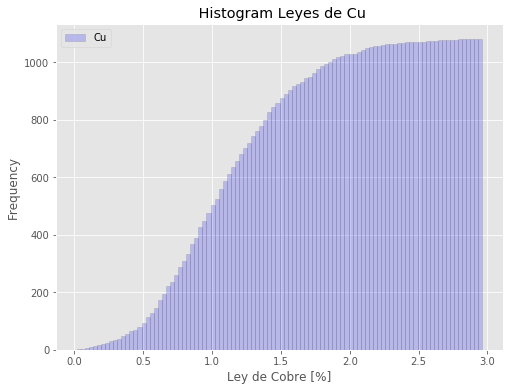

In [28]:
plt.figure(figsize=(8,6))
plt.hist(df['Ley Cu [%]'], alpha=.2, edgecolor = 'black', bins = 100, color = 'blue', label = 'Cu', cumulative=True) 
plt.xlabel('Ley de Cobre [%]')
plt.ylabel('Frequency')
plt.title(' Histogram Leyes de Cu')
plt.legend()
plt.show()

*Diagrama de cajas y bigotes*

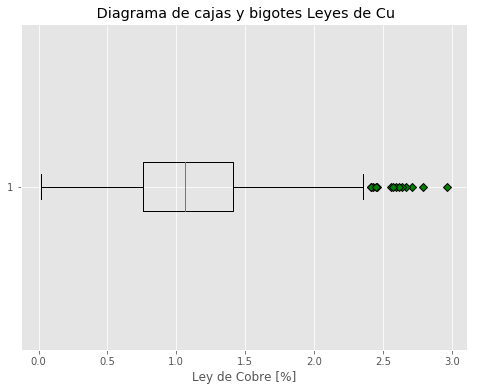

In [29]:
diamantes = dict(markerfacecolor = 'g', marker = 'D')
plt.figure(figsize=(8,6))
plt.boxplot(df["Ley Cu [%]"], vert = False,  flierprops = diamantes, showfliers = True)
plt.xlabel('Ley de Cobre [%]')
plt.title(' Diagrama de cajas y bigotes Leyes de Cu')
plt.show()

## 6.- Variograma – [PyKrige]

**Bibliotecas para el uso de PyKrige**

In [30]:
import pykrige
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'gaussian' Variogram Model
Partial Sill: 0.12584010373869597
Full Sill: 0.2727617445705192
Range: 348.59960065709765
Nugget: 0.14692164083182324 



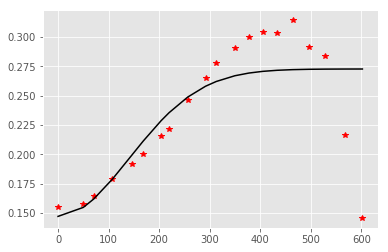

Calculating statistics on variogram model fit...


In [31]:
Ordinary_Krig = OrdinaryKriging(x,y,cu, variogram_model='gaussian', nlags=20,enable_plotting=True,verbose=True)

## 7.- Crear grilla referente a los limites del modelo con celdas de tamaño seleccionadas por el estudiante.

In [32]:
import os

In [33]:
# cambio de directorio
os.chdir('C:/Users/DDA_CDEA/Desktop/Daniel_Eduardo/Excel-stuff_and_programming/Programming-exercises/Python_programming/Curso_geoPython/Unidad IV. Análisis Estructural/GSLIB_PYTHON')

In [34]:
cu_np = df.values # Transforma un DataFrame de pandas en un numpy array
cu_np.shape

(1080, 5)

In [35]:
nx = 70; ny = 70;

In [36]:
# utilidad para convertir archivos GSLIB Geo-EAS en una ndarray numpy para usar con métodos Python
def GSLIB2ndarray(data_file,kcol,nx,ny):
    import os
    import numpy as np  

    colArray = []
    if ny > 1:
        array = np.ndarray(shape=(ny,nx),dtype=float,order='F')
    else:
        array = np.zeros(nx)
        
    with open(data_file) as myfile:  
        head = [next(myfile) for x in range(2)]
        line2 = head[1].split()
        ncol = int(line2[0])          
        for icol in range(0, ncol):   
            head = [next(myfile) for x in range(1)]
            if icol == kcol:
                col_name = head[0].split()[0]
        for iy in range(0,ny):
            for ix in range(0,nx):
                head = [next(myfile) for x in range(1)]
                array[ny-1-iy][ix] = head[0].split()[kcol]
    return array,col_name

In [37]:
# utilidad para convertir matriz numpy en un archivo Geo-EAS GSLIB para usar con métodos GSLIB  
def ndarray2GSLIB(array,data_file,col_name):
    file_out = open(data_file, "w")
    file_out.write(data_file + '\n')  
    file_out.write('1 \n')  
    file_out.write(col_name  + '\n') 
    if array.ndim == 2:
        ny = (array.shape[0])
        nx = (array.shape[1])
        ncol = 1
        for iy in range(0, ny):
            for ix in range(0, nx):
                file_out.write(str(array[ny-1-iy,ix])+ '\n')        
    elif array.ndim == 1:
        nx = len(array)        
        for ix in range(0, nx):
            file_out.write(str(array[ix])+ '\n')             
    else:       
        Print("Error: must use a 2D array")            
        file_out.close()
        return            
    file_out.close()

In [38]:
# Transformación normal. 
def nscore(x):
    import os
    import numpy as np
    file = 'nscore_out.dat'
    ndarray2GSLIB(x,"nscore.dat","value")
    
    file = open("nscore.par", "w")
    file.write("                  Parameters for NSCORE                                    \n")
    file.write("                  *********************                                    \n")
    file.write("                                                                           \n")
    file.write("START OF PARAMETERS:                                                       \n")
    file.write("nscore.dat           -file with data                                       \n")
    file.write("1   0                    -  columns for variable and weight                \n")
    file.write("-1.0e21   1.0e21         -  trimming limits                                \n")
    file.write("0                        -1=transform according to specified ref. dist.    \n")
    file.write("../histsmth/histsmth.out -  file with reference dist.                      \n")
    file.write("1   2                    -  columns for variable and weight                \n")
    file.write("nscore.out               -file for output                                  \n")
    file.write("nscore.trn               -file for output transformation table             \n")
    file.close()

    os.system('nscore.exe nscore.par')
    file_in = 'nscore.out'
    y,name = GSLIB2ndarray('nscore.out',1,nx,ny)
    return(y)

In [39]:
# gráfico de píxeles, reimplementación en Python de GSLIB pixelplt con métodos MatPlotLib
def pixelplt(array,xmin,xmax,ymin,ymax,step,vmin,vmax,title,xlabel,ylabel,vlabel,cmap):
    xx, yy = np.meshgrid(np.arange(xmin, xmax, step),np.arange(ymax, ymin, -1*step))
    plt.figure(figsize=(8,6))
    im = plt.contourf(xx,yy,array,cmap=cmap,vmin=vmin,vmax=vmax,levels=np.linspace(vmin,vmax,100))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    cbar = plt.colorbar(im,orientation = 'vertical',ticks=np.linspace(vmin,vmax,10))
    cbar.set_label(vlabel, rotation=270, labelpad=20)
    plt.show()
    return im

In [40]:
cu_nscore_np = GSLIB.nscore(np.asarray(df["Ley Cu [%]"]))

In [41]:
nscore_np = nscore(cu_np)

In [42]:
nscore_np.shape

(70, 70)

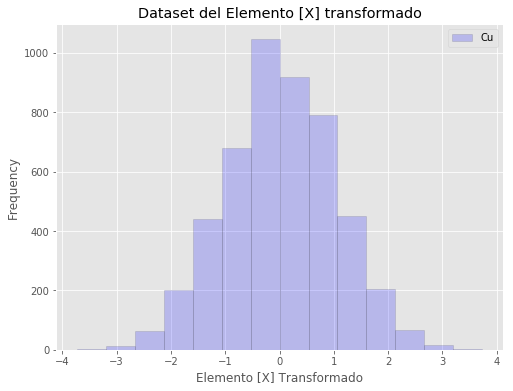

In [43]:
plt.figure(figsize=(8,6))
plt.hist(nscore_np.flatten(), alpha=.2, edgecolor = 'black', bins = "sturges", color = 'blue', label = 'Cu') 
plt.xlabel('Elemento [X] Transformado')
plt.ylabel('Frequency')
plt.title("Dataset del Elemento [X] transformado")
plt.legend()
plt.show()

In [44]:
nx = 100; ny = 100; cell_size = 10                              # número y tamaño de la celdas
xmin = 200; ymin = 200                                              # origen de la grilla
xmax = xmin + nx*cell_size; ymax = ymin + ny*cell_size   


In [45]:
# regular spaced data, 2D wrapper for varmap from GSLIB (.exe must be in working directory)
def varmap_2d(array,nx,ny,hsiz,nlagx,nlagy,minpairs,vmax,bstand,title,vlabel):
    import os
    import numpy as np
     
    ndarray2GSLIB(array,"varmap_out.dat","gam.dat")
    
    file = open("varmap.par", "w")
    
    file.write("              Parameters for VARMAP                                        \n")
    file.write("              *********************                                        \n")
    file.write("                                                                           \n")
    file.write("START OF PARAMETERS:                                                       \n")
    file.write("varmap_out.dat          -file with data                                    \n")
    file.write("1   1                        -   number of variables: column numbers       \n")
    file.write("-1.0e21     1.0e21           -   trimming limits                           \n")
    file.write("1                            -1=regular grid, 0=scattered values           \n")
    file.write(str(nx) + " " + str(ny) + " 1  -if =1: nx,     ny,   nz                     \n")
    file.write(str(hsiz) + " " + str(hsiz) + " 1.0  - xsiz, ysiz, zsiz                     \n") 
    file.write("1   2   0                    -if =0: columns for x,y, z coordinates        \n") 
    file.write("varmap.out                   -file for variogram output                    \n")
    file.write(str(nlagx) + " " + str(nlagy) + " 0 " + "-nxlag, nylag, nzlag               \n")
    file.write(str(hsiz) + " " + str(hsiz) + " 1.0              -dxlag, dylag, dzlag       \n")
    file.write(str(minpairs) + "             -minimum number of pairs                      \n")
    file.write(str(bstand) + "               -standardize sill? (0=no, 1=yes)              \n")
    file.write("1                            -number of variograms                         \n") 
    file.write("1   1   1                    -tail, head, variogram type                   \n")
    file.close()
    
    os.system('varmap.exe varmap.par')
    nnx = nlagx*2+1; nny = nlagy*2+1
    varmap, name = GSLIB2ndarray("varmap.out",0,nnx,nny)               
          
    xmax = ((float(nlagx)+0.5)*hsiz); xmin = -1*xmax; 
    ymax = ((float(nlagy)+0.5)*hsiz); ymin = -1*ymax; 
    pixelplt(varmap,xmin,xmax,ymin,ymax,hsiz,0,vmax,title,'X','Y',vlabel,cmap)
    return(varmap)

In [46]:
np.max(nscore_np)

3.73841

In [47]:
df["NCu"] = cu_nscore_np

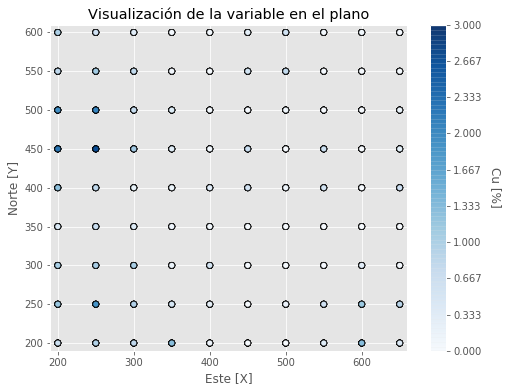

In [48]:
cmap = plt.cm.Blues
GSLIB.locmap(df, xcol="Este [X]",ycol="Norte [Y]",vcol="NCu",xmin=190,xmax=660,ymin=190,ymax=610,
             vmin=0,vmax=3,title="Visualización de la variable en el plano",
             xlabel="Este [X]",ylabel="Norte [Y]",vlabel="Cu [%]",cmap=cmap,fig_name="Var_")
plt.show()

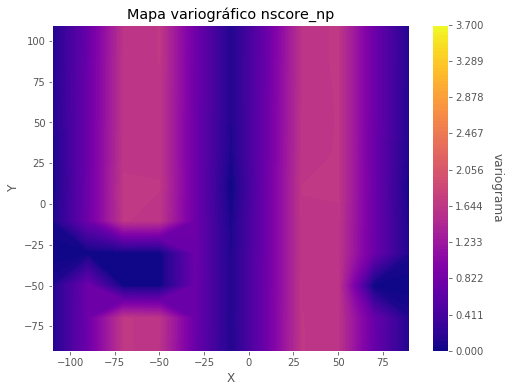

In [108]:
nlagx = 5; nlagy = 5; minpairs = 1; bstand = 1
vmax = 3.7; cmap = plt.cm.plasma                       # color min, color max y mapa de colores para visualización

cu_varmap = varmap_2d(nscore_np,70,70,20,nlagx,nlagy,minpairs,vmax,bstand,"Mapa variográfico nscore_np","variograma")

**Variograma experimental malla 2D:** *Regular*

In [50]:
def gam_2d(array,nx,ny,hsiz,nlag,xlag,ylag,bstand):
    import os
    import numpy as np
    
    lag = []; gamma = []; npair = []
    
    ndarray2GSLIB(array,"gam_out.dat","gam.dat")
    
    file = open("gam.par", "w")
    file.write("                  Parameters for GAM                                       \n")
    file.write("                  ******************                                       \n")
    file.write("                                                                           \n")
    file.write("START OF PARAMETERS:                                                       \n")
    file.write("gam_out.dat           -file with data                                      \n")
    file.write("1   1   0             -   number of variables, column numbers              \n")
    file.write("-1.0e21     1.0e21    -   trimming limits                                  \n")
    file.write("gam.out               -file for variogram output                           \n")
    file.write("1                     -grid or realization number                          \n")
    file.write(str(nx) + " 0.0 " + str(hsiz) + "  -nx, xmn, xsiz                           \n")
    file.write(str(ny) + " 0.0 " + str(hsiz) + "  -ny, ymn, ysiz                           \n")
    file.write(" 1   0.5   1.0        -nz, zmn, zsiz                                       \n")
    file.write("1 " + str(nlag) + "   -number of directions, number of lags                \n")
    file.write(str(xlag) + " " + str(ylag) + " 0 -ixd(1),iyd(1),izd(1)                     \n")
    file.write("1                     -standardize sill? (0=no, 1=yes)                     \n")
    file.write("1                     -number of variograms                                \n")
    file.write("1   1   1             -tail variable, head variable, variogram type        \n") 
    file.close()
    
    os.system('gam.exe gam.par')
    reading = True
    with open("gam.out") as myfile:   
        head = [next(myfile) for x in range(1)] # skip the first line
        iline = 0
        while reading:
            try:
                head = [next(myfile) for x in range(1)]
                lag.append(float(head[0].split()[1]))
                gamma.append(float(head[0].split()[2]))
                npair.append(float(head[0].split()[3]))
                iline = iline + 1
            except StopIteration:
                reading = False   
    
    return(lag,gamma,npair)

In [51]:
def vargplts(lag,gamma,npair,vtype,name,xmin,xmax,ymin,ymax,sill,title,cmap):
    plt.figure(figsize=(8,6))
    marker = ["o","v","s","h","^",">","<"]
    nvar = lags.shape[0]
    for ivar in range(0, nvar):
        if vtype[ivar]==0:
            im = plt.scatter(lag[ivar],gamma[ivar],s=None,label = name[ivar],c=npair[ivar], marker=marker[ivar], cmap=cmap, norm=None, alpha=0.8, linewidths=0.8, verts=None, edgecolors="black")
        else:
            plt.plot(lag[ivar],gamma[ivar], 'C3', lw=3,c='black')
    ixy = 0 
    plt.title(title)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)    
    plt.xlabel('Lag Distance (m)')
    plt.ylabel('Variogram')
    plt.arrow(0,sill,xmax,0,width=0.002,color='red',head_length=0.0,head_width=0.0)
    plt.legend(loc = 'lower right')
    cbar = plt.colorbar(im, orientation = 'vertical')
    cbar.set_label('Number of Pairs', rotation=270, labelpad=20)
    plt.show()
    return im

In [94]:
# xlag = 1; ylag = 0 # Esto calcularía los variogramas desde x e y
lag_x, gamma_x, npair_x = gam_2d(nscore_np,70,70,20,nlag=35,xlag=1,ylag=0,bstand=1) 

In [95]:
gamma_x

[0.76319,
 1.64594,
 1.65504,
 0.75578,
 0.0298,
 0.76526,
 1.64501,
 1.65793,
 0.75717,
 0.04365,
 0.76528,
 1.64212,
 1.66096,
 0.7556,
 0.05316,
 0.76625,
 1.64085,
 1.66455,
 0.75772,
 0.06119,
 0.76431,
 1.63778,
 1.66479,
 0.75774,
 0.06646,
 0.76331,
 1.63294,
 1.65942,
 0.75878,
 0.06615,
 0.76256,
 1.63674,
 1.66318,
 0.76099,
 0.06582]

*nlag + 10 = 80 (sólo para ver luego en el gráfico el variograma 0° azimuth con mayor extensión que el de 90°)*

In [96]:
lag_y, gamma_y, npair_y = gam_2d(nscore_np,70,70,20,nlag=45,xlag=0,ylag=1,bstand=1) 

*Ahora combinaremos para pasar a una lista de matrices Numpy y posteriormente realizar el plot:*

In [97]:
lags = np.array([lag_x, lag_y])
gammas = np.array([gamma_x, gamma_y])
npairs = np.array([npair_x, npair_y])

*Indicaremos que los 2 variogramas son experimentales (tanto el de 0° azimuth como el de 90° azimuth)*

In [98]:
vtypes = [0,0]
names = ["Azimuth 90°", "Azimuth 0°"]

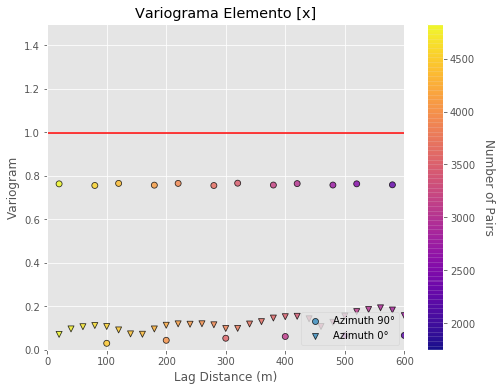

In [99]:
vargplts(lags, gammas, npairs, vtypes, names, 0, 600, 0, 1.5, 1, "Variograma Elemento [x]", cmap)
plt.show() 

*Haremos un variograma experimental aplicado a un modelo teórico esférico*

In [58]:
def vmodel_2d(nlag,step,azi,nug,nst,tstr1,c1,azi1,rmaj1,rmin1,tstr2=1,c2=0,azi2=0,rmaj2=0,rmin2=0):
    import os
    import numpy as np

    lag = []; gamma = []
    
    file = open("vmodel.par", "w")
    file.write("                                                                           \n")
    file.write("                  Parameters for VMODEL                                    \n")
    file.write("                  *********************                                    \n")
    file.write("                                                                           \n")
    file.write("START OF PARAMETERS:                                                       \n")
    file.write("vmodel.var                   -file for variogram output                    \n")
    file.write("1 " + str(nlag) + "          -number of directions and lags                \n")
    file.write(str(azi) + " 0.0 " + str(step) + " -azm, dip, lag distance                  \n")
    file.write(str(nst) + " " + str(nug) + " -nst, nugget effect                           \n")
    file.write(str(tstr1) + " " + str(c1) + " " + str(azi1) + " 0.0   0.0   0.0 -it,cc,ang1,ang2,ang3 \n")
    file.write(str(rmaj1) + " " + str(rmin1) + " 0.0 -a_hmax, a_hmin, a_vert               \n")
    file.write(str(tstr2) + " " + str(c2) + " " + str(azi2) + " 0.0   0.0   0.0 -it,cc,ang1,ang2,ang3 \n")
    file.write(str(rmaj2) + " " + str(rmin2) + " 0.0 -a_hmax, a_hmin, a_vert               \n")
    file.close()
    
    os.system('vmodel.exe vmodel.par')
    reading = True
    with open("vmodel.var") as myfile:   
        head = [next(myfile) for x in range(1)] # skip the first line
        iline = 0
        while reading:
            try:
                head = [next(myfile) for x in range(1)]
                lag.append(float(head[0].split()[1]))
                gamma.append(float(head[0].split()[2]))
                iline = iline + 1
            except StopIteration:
                reading = False   
    
    return(lag,gamma)

In [59]:
# tstr1=1 (modelo esférico)
# tstr1=2 (modelo exponencial)
# tstr1=3 (modelo gaussiano)

azi = 90;
rmaj = 500; # Alcance en el eje mayor 
rmin = 300; # Alcance en el eje menor

lag_x_mod,gamma_x_mod = vmodel_2d(nlag=70,step=10,azi=90,nug=0,nst=1,tstr1=1,c1=1,azi1=0,rmaj1=rmaj,rmin1=rmin)

lag_y_mod,gamma_y_mod = vmodel_2d(nlag=70,step=10,azi=0,nug=0,nst=1,tstr1=1,c1=1,azi1=azi,rmaj1=rmaj,rmin1=rmin)

*Para visualizar el variograma, debemos crear primero unas matrices numpy y posteriormente a ello, utilizar una función ya conocida* **"vargplts"**

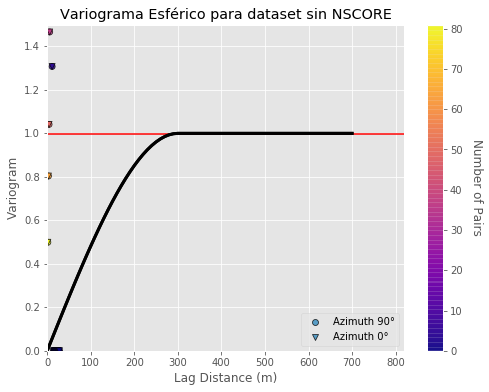

In [60]:
lags = np.array([lag_x, lag_y, lag_x_mod, lag_y_mod])
gammas = np.array([gamma_x, gamma_y, gamma_x_mod, gamma_y_mod])
npairs = np.array([npair_x, npair_y])
vtypes = [0,0,1,1]
names = ["Azimuth 90°", "Azimuth 0°"]

vargplts(lags,gammas,npairs,vtypes,names,0,820,0,1.5,1,"Variograma Esférico para dataset sin NSCORE",cmap)
plt.show()

## 8.- Generación de estimación mediante Kriging Ordinario, obteniendo además varianza de estimación.

**Discretizamos el área**

In [61]:
grid_x = np.linspace(200, 660, num=46, endpoint=False)
grid_y = np.linspace(200, 610, num=41, endpoint=False)
grid_z = np.linspace(75, 135, num=12, endpoint=False)

In [62]:
yg, xg = np.meshgrid(grid_y, grid_x, indexing='ij')

In [63]:
yg.shape

(41, 46)

In [64]:
z, ss = Ordinary_Krig.execute('grid', grid_x, grid_y) # Estimación de kriging ordinario en (z) y varianza de estimación de Ordinary Kriging en ss

Executing Ordinary Kriging...



In [65]:
kt.write_asc_grid(grid_x, grid_y, z, filename="kriging_ordinario.asc") # pasaremos grid_x, grig_y, z y un nombre de salida para el archivo
kt.write_asc_grid(grid_x, grid_y, ss, filename="kriging_ordinario_var.asc")

In [66]:
asc = pd.read_csv("kriging_ordinario.asc", header=None, skiprows=7, sep="\s+")
asc1 = pd.read_csv("kriging_ordinario_var.asc", header=None, skiprows=7, sep="\s+")

In [67]:
asc.shape

(41, 46)

In [68]:
asc1.shape

(41, 46)

**Transformaremos este DataFrame en una matriz Numpy**

In [69]:
cu2 = np.array(asc) # conversión a ndarray: estimación ley Cu

In [70]:
cu3 = np.array(asc1) # conversión a ndarray: variación de estimación ley Cu

**Ploteo final de la estimación de Ordinary Kriging:**

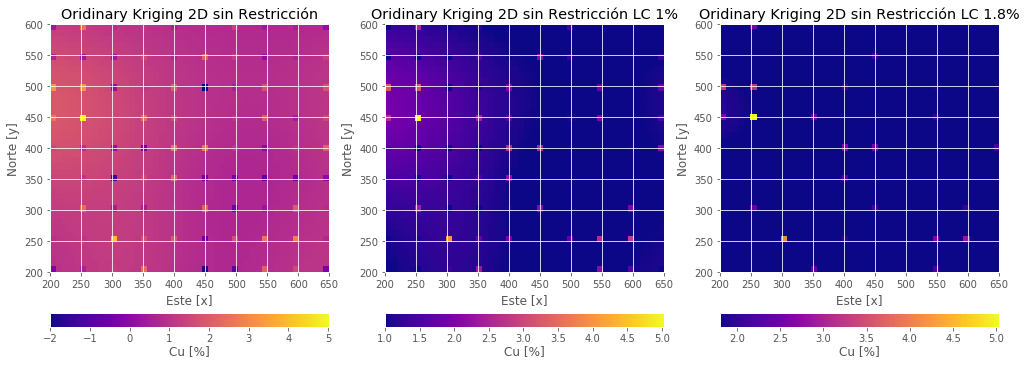

In [71]:
fig = plt.figure(figsize=(17,15))

plot1 = fig.add_subplot(131)

a = plt.imshow(cu2, cmap=plt.cm.plasma, extent=[200,650,200,600])
plt.grid(True)
cbar = fig.colorbar(a, orientation="horizontal", pad=.05)
cbar.set_label("Cu [%]", labelpad=+1)
plt.xlabel("Este [x]"), plt.ylabel("Norte [y]")
plt.title("Oridinary Kriging 2D sin Restricción")

plot2 = fig.add_subplot(132)

b = plt.imshow(cu2, cmap=plt.cm.plasma, extent=[200,650,200,600], vmin=1)
plt.grid(True)
cbar = fig.colorbar(b, orientation="horizontal", pad=.05)
cbar.set_label("Cu [%]", labelpad=+1)
plt.xlabel("Este [x]"), plt.ylabel("Norte [y]")
plt.title("Oridinary Kriging 2D sin Restricción LC 1%")

plot3 = fig.add_subplot(133)

c = plt.imshow(cu2, cmap=plt.cm.plasma, extent=[200,650,200,600], vmin=1.8)
plt.grid(True)
cbar = fig.colorbar(c, orientation="horizontal", pad=.05)
cbar.set_label("Cu [%]", labelpad=+1)
plt.xlabel("Este [x]"), plt.ylabel("Norte [y]")
plt.title("Oridinary Kriging 2D sin Restricción LC 1.8%")

plt.show()

In [72]:
d = {"Este [x]": xg.flatten(), "Norte [y]": yg.flatten(), "Cu_OK [%]": z.data.flatten(), "Variance": ss.data.flatten()}
df2 = pd.DataFrame(data=d)
df2.head()

,Este [x],Norte [y],Cu_OK [%],Variance
0,200.0,200.0,-0.146138,-0.936548
1,210.0,200.0,1.018718,0.151647
2,220.0,200.0,1.055249,0.151032
3,230.0,200.0,1.090456,0.150628
4,240.0,200.0,1.123460,0.150379


In [73]:
df2.shape

(1886, 4)

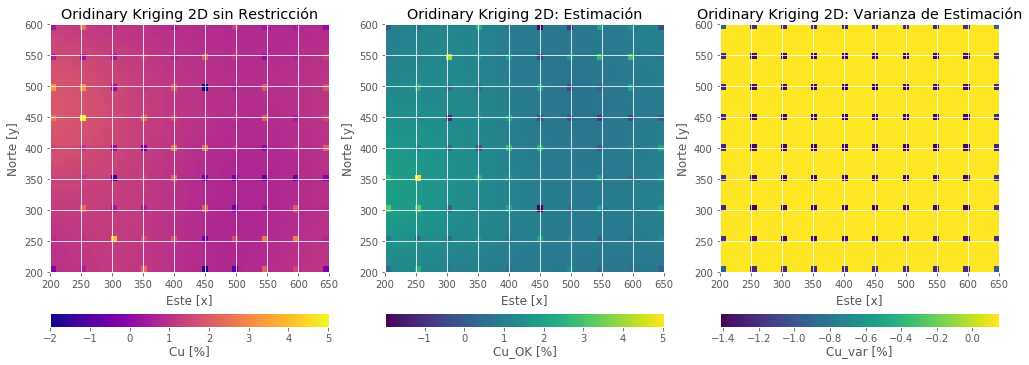

In [74]:
fig = plt.figure(figsize=(17,15))

plot1 = fig.add_subplot(131)

a = plt.imshow(cu2, cmap=plt.cm.plasma, extent=[200,650,200,600])
plt.grid(True)
cbar = fig.colorbar(a, orientation="horizontal", pad=.05)
cbar.set_label("Cu [%]", labelpad=+1)
plt.xlabel("Este [x]"), plt.ylabel("Norte [y]")
plt.title("Oridinary Kriging 2D sin Restricción")

plot2 = fig.add_subplot(132)

b = plt.imshow(z.data, cmap=plt.cm.viridis, extent=[200,650,200,600])
plt.grid(True)
cbar = fig.colorbar(b, orientation="horizontal", pad=.05)
cbar.set_label("Cu_OK [%]", labelpad=+1)
plt.xlabel("Este [x]"), plt.ylabel("Norte [y]")
plt.title("Oridinary Kriging 2D: Estimación")

plot3 = fig.add_subplot(133)

c = plt.imshow(cu3, cmap=plt.cm.viridis, extent=[200,650,200,600])
plt.grid(True)
cbar = fig.colorbar(c, orientation="horizontal", pad=.05)
cbar.set_label("Cu_var [%]", labelpad=+1)
plt.xlabel("Este [x]"), plt.ylabel("Norte [y]")
plt.title("Oridinary Kriging 2D: Varianza de Estimación")

plt.show()

In [75]:
cols = ["Este [X]","Norte [Y]","Ley Cu [%]"]
cu = np.array(df[cols])

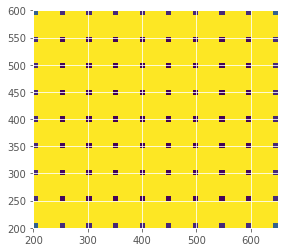

In [76]:
plt.imshow(cu3, cmap=plt.cm.viridis, extent=[200,650,200,600])
plt.show()

In [77]:
GSLIB.gamv_2d

<function geostatspy.GSLIB.gamv_2d(df, xcol, ycol, vcol, nlag, lagdist, azi, atol, bstand)>

In [78]:
GSLIB.gamv_2d(df=df, xcol="Este [X]", ycol="Norte [Y]", vcol="NCu", nlag=11, lagdist=50, azi=0, atol=90, bstand=1)

([0.0,
  0.0,
  59.778,
  107.571,
  151.812,
  203.018,
  256.497,
  303.81,
  352.351,
  398.865,
  448.209,
  499.648,
  543.9],
 [0.57856,
  0.0,
  0.69834,
  0.7721,
  0.83341,
  0.91374,
  1.03605,
  1.14094,
  1.21224,
  1.24409,
  1.26048,
  1.25011,
  1.10179],
 [14040.0,
  0.0,
  87840.0,
  114048.0,
  131040.0,
  210816.0,
  147744.0,
  161856.0,
  118368.0,
  93888.0,
  64800.0,
  14400.0,
  8064.0])

In [79]:
geostats.gamv?